<a href="https://colab.research.google.com/github/pv21287/CE888/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the libraries needed

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import joblib

# Load the dataset

In [107]:
df=pd.read_csv('heart.csv')

In [108]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<function matplotlib.pyplot.show>

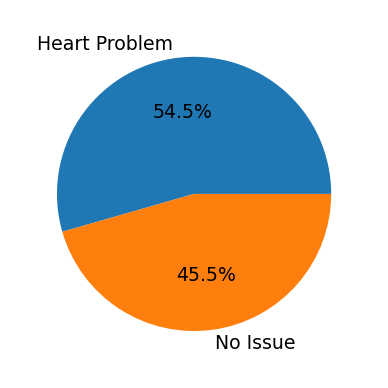

In [110]:
category=['Heart Problem', 'No Issue']
sizes=df['target'].value_counts()
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=category, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

In [111]:
len(df)

303

In [112]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [113]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [114]:
df['sex']=pd.factorize(df['sex'])[0]
df['cp']=pd.factorize(df['cp'])[0]
df['fbs']=pd.factorize(df['fbs'])[0]
df['restecg']=pd.factorize(df['restecg'])[0]
df['exang']=pd.factorize(df['exang'])[0]

df['slope']=pd.factorize(df['slope'])[0]

df['ca']=pd.factorize(df['ca'])[0]

df['thal']=pd.factorize(df['thal'])[0]

# df['exang']=pd.factorize(df['exang'])[0]

# Create the training and test sets

In [115]:
X=df.drop(['target'], axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], 
                                                    test_size=0.3, random_state=42, stratify=y)

# Feature Scaling

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

# Train a Random Forest Classifier

In [117]:
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42, min_samples_split=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [118]:
accuracy_score(y, classifier.predict(X))

0.9174917491749175

In [119]:
accuracy_score(y_train, classifier.predict(X_train))

0.9575471698113207

In [120]:
accuracy_score(y_test, classifier.predict(X_test))

0.8241758241758241

# Obtain the Probabilities for classes

In [121]:
prediction_probs=classifier.predict_proba(X)

In [122]:
len(prediction_probs)

303

In [123]:
len(prediction_probs[0])

2

In [124]:
df['probs_1']=[prediction_probs[i][1] for i in range(len(df.target))]

In [125]:
df['probs_1']=[df['probs_1'][i]>=0.5 for i in range(len(df.target))]*1

In [126]:
df.probs_1

0       True
1       True
2       True
3       True
4       True
       ...  
298    False
299    False
300    False
301    False
302     True
Name: probs_1, Length: 303, dtype: bool

In [127]:
df.probs_1.value_counts()

True     172
False    131
Name: probs_1, dtype: int64

# Decision Tree Classifier trained on the obtained results from RF model

In [128]:
from sklearn.tree import DecisionTreeClassifier

y_tr=df.probs_1[y_train.index]
y_ts=df.probs_1[y_test.index]


dt=DecisionTreeClassifier(max_depth=None, min_samples_leaf=1)

dt.fit(X, df.probs_1)


DecisionTreeClassifier()

In [129]:
accuracy_score(y, dt.predict(X))

0.9174917491749175

In [130]:
accuracy_score(y_tr, dt.predict(X_train))

1.0

In [131]:
accuracy_score(df.target[y_test.index], dt.predict(X_test))

0.8241758241758241

In [132]:
accuracy_score(df.probs_1, dt.predict(X))

1.0

In [133]:
accuracy_score(df.target, dt.predict(X))

0.9174917491749175

In [134]:
dt.predict(X_test)

array([ True,  True, False, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False])

In [135]:
accuracy_score(y_train, dt.predict(X_train))

0.9575471698113207

# Decision Tree Classifier trained on the original data

In [136]:
dt1=DecisionTreeClassifier(max_depth=None, min_samples_leaf=1)

dt1.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
accuracy_score(df.target[y_train.index], dt1.predict(X_train))

1.0

In [138]:
accuracy_score(df.target[y_test.index], dt1.predict(X_test))

0.7032967032967034

In [141]:
accuracy_score(df.target, dt1.predict(X))

0.9108910891089109

In [139]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,probs_1
0,63,0,0,145,233,0,0,150,0,2.3,0,0,0,1,True
1,37,0,1,130,250,1,1,187,0,3.5,0,0,1,1,True
2,41,1,2,130,204,1,0,172,0,1.4,1,0,1,1,True
3,56,0,2,120,236,1,1,178,0,0.8,1,0,1,1,True
4,57,1,3,120,354,1,1,163,1,0.6,1,0,1,1,True


In [140]:
X

array([[ 0.95231512, -0.6723502 , -2.00216363, ..., -2.2326756 ,
        -0.76913164, -2.29141474],
       [-1.89739223, -0.6723502 , -1.02188952, ..., -2.2326756 ,
        -0.76913164, -0.61051535],
       [-1.45897572,  1.48732014, -0.04161541, ..., -0.59486513,
        -0.76913164, -0.61051535],
       ...,
       [ 1.50033577, -0.6723502 ,  0.9386587 , ...,  1.04294535,
         0.12188425,  1.07038405],
       [ 0.29469035, -0.6723502 ,  0.9386587 , ...,  1.04294535,
         1.01290014,  1.07038405],
       [ 0.29469035,  1.48732014, -0.04161541, ...,  1.04294535,
         1.01290014, -0.61051535]])